In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
#引入数据集
df = pd.read_csv('./iris.csv')

In [3]:
#决策树模型
X = df[['petal_length','petal_width']].to_numpy() 
y = df['species']
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## 决策树

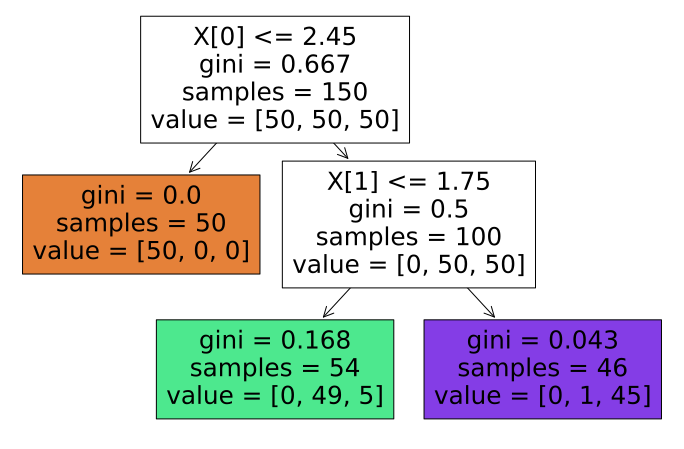

In [7]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf,filled=True);

### 基尼不纯度
$$
G_i = 1 - \sum_{k=1}^n p_{i,k}^2
$$
越小越好

## 随机森林
群体智慧

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

In [9]:
df = pd.read_csv("./penguins_size.csv")
df = df.dropna()
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


企鹅数据集包含特征和标签如下：  
- 特征：所在岛屿 `island`、鸟喙长度 `culmen_length_mm`、鸟喙深度 `culmen_depth_mm`、脚蹼长度 `flipper_length_mm`、体重 `g`、性别 `sex`
- 标签：物种 species： `Chinstrap`, `Adélie`, or `Gentoo`

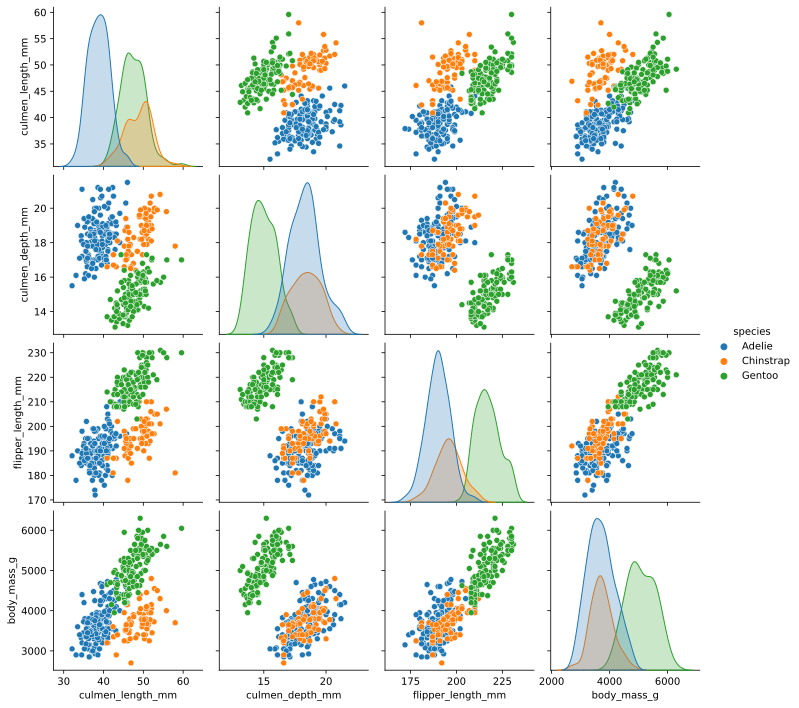

In [10]:
sns.pairplot(df,hue='species');

### 特征工程

In [15]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']
X.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1
6,38.9,17.8,181.0,3625.0,0,1,1,0
7,39.2,19.6,195.0,4675.0,0,1,0,1
12,41.1,17.6,182.0,3200.0,0,1,1,0
13,38.6,21.2,191.0,3800.0,0,1,0,1
14,34.6,21.1,198.0,4400.0,0,1,0,1


In [17]:
X.shape

(334, 8)

### 训练数据

In [18]:
#训练
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(X_train,y_train)

#预测
from sklearn.metrics import accuracy_score
preds = model.predict(X_test)
accuracy_score(y_test,preds)

0.9702970297029703

### 网格搜索与AdaBoost提升法

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=101)
ada_clf.fit(X_train, y_train)
param_grid = {'n_estimators':[10,15,20,25,30,35,40], 'learning_rate':[0.01,0.1,0.5,1], 'algorithm':['SAMME', 'SAMME.R']}
grid = GridSearchCV(ada_clf,param_grid)
grid.fit(X_train,y_train)
print("grid.best_params_ = ",grid.best_params_,", grid.best_score_ =" ,grid.best_score_)

grid.best_params_ =  {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 20} , grid.best_score_ = 0.9914893617021276
